#**Preparing Data with Pandas**#

In [ ]:
import pandas as pd
import numpy as np
import io
import datetime
from matplotlib import pyplot as plt

In [ ]:
# from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read SFPD csv (pre-filtered by larceny/vehicle theft from SFPD)
from google.colab import files
uploaded = files.upload()

Saving Police_Department_Incident_Reports__2018_to_Present.csv to Police_Department_Incident_Reports__2018_to_Present.csv


In [ ]:
rawData = pd.read_csv(io.BytesIO(uploaded['Police_Department_Incident_Reports__2018_to_Present.csv']))
rawData.info()

# We see that there are empty cells in "Analysis Neighborhood" column which is a key variable we will input to our model 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133803 entries, 0 to 133802
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        133803 non-null  object 
 1   Incident Date            133803 non-null  object 
 2   Incident Time            133803 non-null  object 
 3   Incident Year            133803 non-null  int64  
 4   Incident Day of Week     133803 non-null  object 
 5   Report Datetime          133803 non-null  object 
 6   Row ID                   133803 non-null  int64  
 7   Incident ID              133803 non-null  int64  
 8   Incident Number          133803 non-null  int64  
 9   CAD Number               69707 non-null   float64
 10  Report Type Code         133803 non-null  object 
 11  Report Type Description  133803 non-null  object 
 12  Filed Online             63458 non-null   object 
 13  Incident Code            133803 non-null  int64  
 14  Inci

In [ ]:
rawData['Analysis Neighborhood'].replace('', np.nan, inplace=True)

In [ ]:
rawData.dropna(subset=['Analysis Neighborhood'], inplace=True)
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122547 entries, 0 to 133802
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        122547 non-null  object 
 1   Incident Date            122547 non-null  object 
 2   Incident Time            122547 non-null  object 
 3   Incident Year            122547 non-null  int64  
 4   Incident Day of Week     122547 non-null  object 
 5   Report Datetime          122547 non-null  object 
 6   Row ID                   122547 non-null  int64  
 7   Incident ID              122547 non-null  int64  
 8   Incident Number          122547 non-null  int64  
 9   CAD Number               69329 non-null   float64
 10  Report Type Code         122547 non-null  object 
 11  Report Type Description  122547 non-null  object 
 12  Filed Online             52634 non-null   object 
 13  Incident Code            122547 non-null  int64  
 14  Inci

In [ ]:
rawData.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point
0,2018/12/22 12:00:00 PM,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,183601903.0,...,"Vehicle, Stolen, Motorcycle",Open or Active,LINDEN ST \ BUCHANAN ST,25931000.0,Northern,Hayes Valley,5.0,37.775787,-122.427819,POINT (-122.42781910073226 37.77578657487239)
1,2018/08/24 05:30:00 PM,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,182363732.0,...,"Theft, From Locked Vehicle, $200-$950",Open or Active,PERU AVE \ BURROWS ST,21610000.0,Ingleside,Excelsior,9.0,37.723944,-122.422830,POINT (-122.42283006837721 37.72394419349765)
2,2019/01/25 11:00:00 AM,2019/01/25,11:00,2019,Friday,2019/01/25 11:00:00 AM,76297507055,762975,190061487,190251162.0,...,"Vehicle, Recovered, Stolen outside SF",Open or Active,BRYANT ST \ LANGTON ST,23876000.0,Ingleside,South of Market,6.0,37.773856,-122.405286,POINT (-122.40528580238285 37.77385630397913)
3,2018/11/18 08:20:00 PM,2018/11/18,20:20,2018,Sunday,2018/11/18 09:10:00 PM,73895706244,738957,180875862,183223149.0,...,"Theft, From Locked Vehicle, >$950",Open or Active,GEARY BLVD \ PRESIDIO AVE,26834000.0,Richmond,Lone Mountain/USF,2.0,37.782488,-122.445821,POINT (-122.4458205129012 37.782488031626265)
4,2019/04/10 09:00:00 PM,2019/04/10,21:00,2019,Wednesday,2019/04/11 12:36:00 AM,78958506244,789585,196072179,NaN,...,"Theft, From Locked Vehicle, >$950",Open or Active,VAN NESS AVE \ HEMLOCK ST,30080000.0,Northern,Nob Hill,3.0,37.787087,-122.421560,POINT (-122.42155971686209 37.7870872505264)


In [ ]:
# Group Day and Time into key Categories 
# def which_day(day):
#     if day == 'Monday':
#         return 'Weekday'
#     elif day == "Tuesday":
#         return 'Weekday'
#     elif day == 'Wednesday':
#         return 'Weekday'
#     elif day == 'Thursday':
#         return 'Weekday'
#     elif day == 'Friday':
#         return 'Weekday'
#     else:
#         return 'Weekend'

def convert_dt(str):
  date_time_obj = datetime.datetime.strptime(str, '%Y/%m/%d %I:%M:%S %p')
  time = date_time_obj.time()
  return(time)

def which_time(time):
    if datetime.time(11,59,59) >= time >= datetime.time(6,0,0):
        return 'Morning'
    elif datetime.time(17,59,59) >= time >= datetime.time(12,0,0):
        return 'Afternoon'
    elif datetime.time(23,59,59) >= time >= datetime.time(18,0,0):
        return 'Evening'
    else:
        return 'MidNight'
# create a new column based on condition
# rawData['which_day'] = rawData['Incident Day of Week'].apply(which_day)
rawData['Time'] = rawData['Incident Datetime'].apply(convert_dt)
rawData['which_time'] = rawData['Time'].apply(which_time)

In [ ]:
rawData.columns = rawData.columns.str.replace(' ', '_')

In [ ]:
## download csv with new columns
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/clean_data.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  rawData.to_csv(f)

Mounted at /content/drive


Evening      0.385109
Afternoon    0.324471
Morning      0.176259
MidNight     0.114160
Name: which_time, dtype: float64


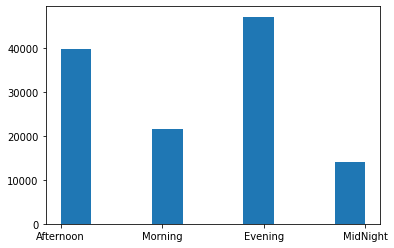

In [ ]:
# Exploration - Break-ins seemed to happen the most during evenings (6-12pm) and afternoons (12-6pm)

print(rawData['which_time'].value_counts(normalize=True))
plt.hist(rawData['which_time'])
plt.show()

In [ ]:
# Exploration - Break-ins seemed to happen evenly thoughout the week


print(rawData['Incident Day of Week'].value_counts(normalize=True))
print()
print(rawData['which_day'].value_counts(normalize=True))

# plt.figure(figsize=(10, 6), dpi=80)
# plt.hist(rawData['Incident Day of Week'])
# plt.show()

Friday       0.157009
Saturday     0.148270
Monday       0.141285
Sunday       0.140950
Wednesday    0.140624
Thursday     0.138894
Tuesday      0.132969
Name: Incident Day of Week, dtype: float64

Weekday    0.71078
Weekend    0.28922
Name: which_day, dtype: float64


In [ ]:
pd.crosstab(index=rawData['Incident Day of Week'], columns=rawData['which_time'], normalize='index')

which_time,Afternoon,Evening,MidNight,Morning
Incident Day of Week,,,,
Friday,0.329869,0.395821,0.103165,0.171145
Monday,0.333141,0.368603,0.111990,0.186265
Saturday,0.325592,0.380737,0.128398,0.165272
Sunday,0.341863,0.343716,0.138829,0.175592
Thursday,0.302450,0.413548,0.107632,0.176370
Tuesday,0.315680,0.403559,0.104388,0.176373
Wednesday,0.321186,0.390298,0.104567,0.183949


#**Analysis Through Spark**#




In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from datetime import datetime, date, timedelta
from dateutil import relativedelta
from pyspark.sql import SQLContext, Row
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import DataFrame
from pyspark.sql.functions import *
from pyspark.sql.functions import to_timestamp, to_date
from pyspark.sql import functions as F  
from pyspark.sql.functions import collect_list, collect_set, concat, first, array_distinct, col, size, expr
from pyspark.sql import DataFrame

In [ ]:
spark = SparkSession\
        .builder\
        .getOrCreate()

In [ ]:
DataUnlabeled = spark\
.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv("/content/drive/My Drive/clean_data.csv")

In [ ]:
DataUnlabeled.cache()
DataUnlabeled.show()

+---+--------------------+-------------+-------------+-------------+--------------------+--------------------+-----------+-----------+---------------+------------+----------------+-----------------------+------------+-------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------+---------------+---------------------+-------------------+------------------+-------------------+--------------------+---------+--------+----------+
|_c0|   Incident_Datetime|Incident_Date|Incident_Time|Incident_Year|Incident_Day_of_Week|     Report_Datetime|     Row_ID|Incident_ID|Incident_Number|  CAD_Number|Report_Type_Code|Report_Type_Description|Filed_Online|Incident_Code|  Incident_Category|Incident_Subcategory|Incident_Description|          Resolution|        Intersection|     CNN|Police_District|Analysis_Neighborhood|Supervisor_District|          Latitude|          Longitude|               Point|which_day|    Time|which_time|
+---+---------

In [ ]:
DataUnlabeled.createOrReplaceTempView("df1")

In [ ]:
# Labeling Data 
# We start by exploring break-in occasions - in which area and during what time break-ins happen most often  

percSql = spark.sql("""
Select *, PERCENT_RANK()OVER(Order by count) as percentile
From 
(SELECT Analysis_Neighborhood, which_day, which_time, count(*) as count
FROM df1
GROUP BY 1,2,3
) t
ORDER BY percentile DESC
""")
percSql.show(5)
percSql.createOrReplaceTempView("pct")

+---------------------+---------+----------+-----+------------------+
|Analysis_Neighborhood|which_day|which_time|count|        percentile|
+---------------------+---------+----------+-----+------------------+
|              Mission|  Weekday|   Evening| 3134|               1.0|
| Financial Distric...|  Weekday|   Evening| 2766|0.9969418960244648|
|          North Beach|  Weekday| Afternoon| 2521|0.9938837920489296|
|      South of Market|  Weekday|   Evening| 2083|0.9908256880733946|
|          North Beach|  Weekday|   Evening| 2045|0.9877675840978594|
+---------------------+---------+----------+-----+------------------+
only showing top 5 rows



In [ ]:
# Labeled the occasions into 3 groups according to their percentile    

rule = spark.sql("""
SELECT *, 
CASE WHEN percentile BETWEEN 0 AND 0.33 THEN 'Low'
WHEN percentile BETWEEN 0.34 AND 0.66 THEN 'Medium'
ELSE 'High' END as Risk_Level
FROM pct
""")
rule.show()
rule.createOrReplaceTempView("rule")

+---------------------+---------+----------+-----+------------------+----------+
|Analysis_Neighborhood|which_day|which_time|count|        percentile|Risk_Level|
+---------------------+---------+----------+-----+------------------+----------+
|              Mission|  Weekday|   Evening| 3134|               1.0|      High|
| Financial Distric...|  Weekday|   Evening| 2766|0.9969418960244648|      High|
|          North Beach|  Weekday| Afternoon| 2521|0.9938837920489296|      High|
|      South of Market|  Weekday|   Evening| 2083|0.9908256880733946|      High|
|          North Beach|  Weekday|   Evening| 2045|0.9877675840978594|      High|
|              Mission|  Weekday| Afternoon| 1998|0.9847094801223242|      High|
| Financial Distric...|  Weekday| Afternoon| 1747| 0.981651376146789|      High|
|         Russian Hill|  Weekday| Afternoon| 1661|0.9785932721712538|      High|
| Bayview Hunters P...|  Weekday| Afternoon| 1493|0.9755351681957186|      High|
|         Hayes Valley|  Wee

In [ ]:
# Apply label to original dataset to label each records  

final_table = spark.sql("""
SELECT d.*, r.Risk_Level
FROM df1 d
LEFT JOIN rule r ON d.Analysis_Neighborhood = r.Analysis_Neighborhood
AND d.which_day = r.which_day
AND d.which_time = r.which_time
""")
final_table.createOrReplaceTempView("df2")
final_table.show()

+---+--------------------+-------------+-------------+-------------+--------------------+--------------------+-----------+-----------+---------------+------------+----------------+-----------------------+------------+-------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------+---------------+---------------------+-------------------+------------------+-------------------+--------------------+---------+--------+----------+----------+
|_c0|   Incident_Datetime|Incident_Date|Incident_Time|Incident_Year|Incident_Day_of_Week|     Report_Datetime|     Row_ID|Incident_ID|Incident_Number|  CAD_Number|Report_Type_Code|Report_Type_Description|Filed_Online|Incident_Code|  Incident_Category|Incident_Subcategory|Incident_Description|          Resolution|        Intersection|     CNN|Police_District|Analysis_Neighborhood|Supervisor_District|          Latitude|          Longitude|               Point|which_day|    Time|which_time|Risk

#**Preparing Data for Model Fitting**#

In [ ]:
##Selecting variables
#model_table = final_table.select('which_day','which_time','Analysis_Neighborhood', 'Risk_Level')
model_table = final_table.select('Incident_Day_of_Week','which_time','Analysis_Neighborhood', 'Risk_Level')
cols = model_table.columns
model_table.printSchema()

root
 |-- Incident_Day_of_Week: string (nullable = true)
 |-- which_time: string (nullable = true)
 |-- Analysis_Neighborhood: string (nullable = true)
 |-- Risk_Level: string (nullable = true)



In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [ ]:
##Code for StringIndex + One Hot Encoder for the Categorical Variables Selected
categoricalColumns = ['Incident_Day_of_Week','which_time','Analysis_Neighborhood']
stages = []


for c in categoricalColumns:
  stringIndexer = StringIndexer(inputCol= c , outputCol = c + 'Index')
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[c + "classVec"])
  stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol = 'Risk_Level', outputCol = 'label')

stages += [label_stringIdx]

##Code for Vector Assembler
assemblerInputs = [c + "classVec" for c in categoricalColumns]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [ ]:
from pyspark.ml import Pipeline

##Pipeline to execute the transformation of features
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(model_table)
model_tabl_transformed = pipelineModel.transform(model_table)
selectedCols = ['label', 'features'] + cols
model_tabl_transformed = model_tabl_transformed.select(selectedCols)
model_tabl_transformed.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- Incident_Day_of_Week: string (nullable = true)
 |-- which_time: string (nullable = true)
 |-- Analysis_Neighborhood: string (nullable = true)
 |-- Risk_Level: string (nullable = true)



In [ ]:
model_tabl_transformed.show()

+-----+--------------------+--------------------+----------+---------------------+----------+
|label|            features|Incident_Day_of_Week|which_time|Analysis_Neighborhood|Risk_Level|
+-----+--------------------+--------------------+----------+---------------------+----------+
|  0.0|(49,[1,7,15],[1.0...|            Saturday| Afternoon|         Hayes Valley|      High|
|  0.0|(49,[0,7,33],[1.0...|              Friday| Afternoon|            Excelsior|      High|
|  0.0|(49,[0,8,12],[1.0...|              Friday|   Morning|      South of Market|      High|
|  1.0|(49,[3,6,37],[1.0...|              Sunday|   Evening|    Lone Mountain/USF|    Medium|
|  0.0|(49,[4,6,21],[1.0...|           Wednesday|   Evening|             Nob Hill|      High|
|  0.0|(49,[3,6,17],[1.0...|              Sunday|   Evening|           Tenderloin|      High|
|  2.0|(49,[3,7,39],[1.0...|              Sunday| Afternoon|              Portola|       Low|
|  0.0|(49,[1,8,10],[1.0...|            Saturday|   Morning|

In [ ]:
## Train and test split using 70% and 30%
train, test = model_tabl_transformed.randomSplit([0.7, 0.3], seed = 42)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 85859
Test Dataset Count: 36688


#**Random Forest Classifier**#

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
#predictions.select('which_day','which_time','Analysis_Neighborhood', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

In [ ]:
#predictions.show()

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g" %  accuracy)



Accuracy = 0.749591


#**Multinomial Logistic Regression**#

In [ ]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(train)
predictions_mlr = lrModel.transform(test)

#predictions_mlr.select('which_day','which_time','Analysis_Neighborhood', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

In [ ]:
# Select (prediction, true label) and compute test error
evaluator_mlr = MulticlassClassificationEvaluator(predictionCol="prediction",metricName="accuracy")
accuracy_mlr = evaluator_mlr.evaluate(predictions_mlr)

print("Accuracy = %g" %  accuracy_mlr)


Accuracy = 0.774177


IDK trying to split data differently to see if MLR consistently perform better?

In [ ]:
import random
for loops in range(0,10):
  
  print("Loop ", str(loops+1))

  ##generating a random number and using that as seed for split
  seed_r = random.randrange(0, 10000)
  train, test = model_tabl_transformed.randomSplit([0.7, 0.3], seed = seed_r)

  rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')


  rfModel = rf.fit(train)
  predictions = rfModel.transform(test)
  evaluator = MulticlassClassificationEvaluator(
  labelCol="label", predictionCol="prediction", metricName="accuracy")
  accuracy = evaluator.evaluate(predictions)
  print("Accuracy_RF = %g" %  accuracy)


  lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
  lrModel = lr.fit(train)
  predictions_mlr = lrModel.transform(test)

  evaluator_mlr = MulticlassClassificationEvaluator(predictionCol="prediction",metricName="accuracy")
  accuracy_mlr = evaluator_mlr.evaluate(predictions_mlr)


  print("Accuracy_MLR = %g" %  accuracy_mlr)


Loop  1
Accuracy_RF = 0.756326
Accuracy_MLR = 0.776317
Loop  2
Accuracy_RF = 0.750238
Accuracy_MLR = 0.772491
Loop  3
Accuracy_RF = 0.752216
Accuracy_MLR = 0.776736
Loop  4
Accuracy_RF = 0.753691
Accuracy_MLR = 0.775684
Loop  5
Accuracy_RF = 0.751482
Accuracy_MLR = 0.775757
Loop  6
Accuracy_RF = 0.7486
Accuracy_MLR = 0.779186
Loop  7
Accuracy_RF = 0.75038
Accuracy_MLR = 0.776821
Loop  8
Accuracy_RF = 0.75612
Accuracy_MLR = 0.775601
Loop  9
Accuracy_RF = 0.750667
Accuracy_MLR = 0.776158
Loop  10
Accuracy_RF = 0.761409
Accuracy_MLR = 0.777741


# **Confusion Matrices**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## MLR 
y_true_rf = predictions.select("label")
y_true_rf = y_true_rf.toPandas()

y_pred_rf = predictions.select("prediction")
y_pred_rf = y_pred_rf.toPandas()

cnf_matrix_rf = confusion_matrix(y_true_rf, y_pred_rf)
cnf_matrix_rf

array([[27294,     0,     0],
       [ 7071,   207,     0],
       [ 2040,    76,     0]])

[Text(0, 0.5, 'High Risk'),
 Text(0, 1.5, 'Medium Risk'),
 Text(0, 2.5, 'Low Risk')]

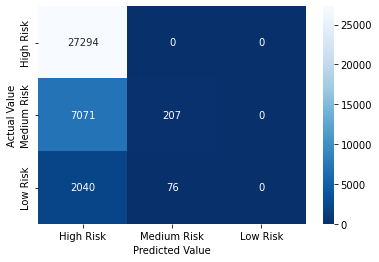

In [ ]:
cm_plot_rf = sns.heatmap(cnf_matrix_rf, annot = True, cmap = 'Blues_r', fmt='g')
cm_plot_rf.set_xlabel('Predicted Value')
cm_plot_rf.set_ylabel('Actual Value')
cm_plot_rf.xaxis.set_ticklabels(['High Risk', 'Medium Risk', 'Low Risk'])
cm_plot_rf.yaxis.set_ticklabels(['High Risk', 'Medium Risk', 'Low Risk'])

In [ ]:
rf_sum = classification_report(y_true_rf, y_pred_rf, target_names = ['High Risk', 'Medium Risk', 'Low Risk'])
print(rf_sum)

              precision    recall  f1-score   support

   High Risk       0.75      1.00      0.86     27294
 Medium Risk       0.73      0.03      0.05      7278
    Low Risk       0.00      0.00      0.00      2116

    accuracy                           0.75     36688
   macro avg       0.49      0.34      0.30     36688
weighted avg       0.70      0.75      0.65     36688



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## MLR 
y_true_mlr = predictions_mlr.select("label")
y_true_mlr = y_true_mlr.toPandas()

y_pred_mlr = predictions_mlr.select("prediction")
y_pred_mlr = y_pred_mlr.toPandas()

cnf_matrix_mlr = confusion_matrix(y_true_mlr, y_pred_mlr)
cnf_matrix_mlr

array([[27258,    36,     0],
       [ 6328,   950,     0],
       [  812,  1109,   195]])

[Text(0, 0.5, 'High Risk'),
 Text(0, 1.5, 'Medium Risk'),
 Text(0, 2.5, 'Low Risk')]

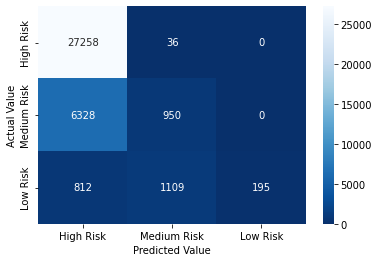

In [ ]:
cm_plot_mlr = sns.heatmap(cnf_matrix_mlr, annot = True, cmap = 'Blues_r', fmt='g')
cm_plot_mlr.set_xlabel('Predicted Value')
cm_plot_mlr.set_ylabel('Actual Value')
cm_plot_mlr.xaxis.set_ticklabels(['High Risk', 'Medium Risk', 'Low Risk'])
cm_plot_mlr.yaxis.set_ticklabels(['High Risk', 'Medium Risk', 'Low Risk'])

In [ ]:
mlr_sum = classification_report(y_true_mlr, y_pred_mlr, target_names = ['High Risk', 'Medium Risk', 'Low Risk'])
print(mlr_sum)

              precision    recall  f1-score   support

   High Risk       0.79      1.00      0.88     27294
 Medium Risk       0.45      0.13      0.20      7278
    Low Risk       1.00      0.09      0.17      2116

    accuracy                           0.77     36688
   macro avg       0.75      0.41      0.42     36688
weighted avg       0.74      0.77      0.71     36688

